# Color Identification in Images
## Sanya Nanda

### Implement an image color detector which identifies all the colors in an image

In [1]:
# importing required libraries and the images
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt

img_path = "/home/tapli/TSF-GripJune21/color1.jpg"
img = cv2.imread(img_path)
img_path1 = "/home/tapli/TSF-GripJune21/color2.jpg"
img1 = cv2.imread(img_path1)

In [2]:
# resizing the images and intializing required variables
img=cv2.resize(img,(700,500))
img1=cv2.resize(img1,(700,500))
clicked = False
r = g = b = xpos = ypos = 0

In [3]:
# importing the color csv that contains names of most of the colors with their hex and RGB code
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv("color.csv", names=index, header=None)

In [4]:
# On double clicking anwhere on the picture, we get the x, y coordinates and the RGB values at that position.
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [5]:
# Finds the color in our csv file which is closest to the color that we have clicked on, returns the name of the 
# color detected 
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G-int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [6]:
def color_detect(img):
    cv2.namedWindow('color detection')
    #cv2. setWindowProperty ('color detection', cv2. WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    
    # let's the user interact with the image using the mouse. In this case the event is double click
    cv2.setMouseCallback('color detection',draw_function)
    
    global clicked
    while(1):
        cv2.imshow("color detection",img)
        if (clicked):

            #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
            cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)

            #Creating text string to display Color name and RGB values on the window
            text = getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)

            #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType)
            cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

            #For very light colors text will be displayed in black 
            if(r+g+b>=600):
                cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)

            clicked=False

        if cv2.waitKey(20) & 0xFF ==27:
            break
    cv2.destroyAllWindows()

In [7]:
color_detect(img)

In [8]:
color_detect(img1)

In [8]:
# converts image from bgr to rgb
def get_image(image_path):
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
# returns the color code in hex
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [10]:
# returns the color code values in RGB
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

In [11]:
# employs KMeans clustering: unsupervised ML, to plot the top most common colors in the image
def get_colors(img,no_of_colors):
    modified_image = cv2.resize(img, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    clf = KMeans(n_clusters = no_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    print(hex_colors)
    h=[getColorName(hex_to_rgb(i)[0],hex_to_rgb(i)[1],hex_to_rgb(i)[2]) for i in hex_colors]
    print(h)
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = h, colors = hex_colors)

['#de4841', '#1e69bc', '#60dac1', '#f3ebd5', '#ebc93f', '#935d8e', '#e0b0a7', '#3d2b38']
['Carmine Pink', 'Denim', 'Medium Aquamarine', 'Eggshell', 'Sandstorm', 'Antique Fuchsia', 'Pale Chestnut', 'Black Olive']


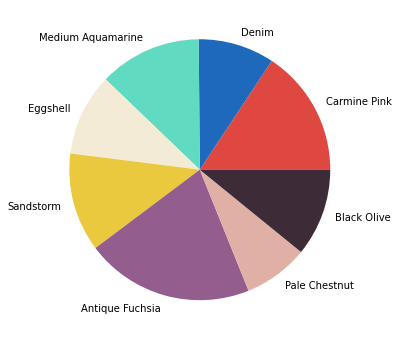

In [12]:
get_colors(get_image(img_path), 8)

In [ ]:
get_colors(get_image(img_path1), 8)